<h1 style = "text-align:center; font-size:300%; color:#c91d42">Breast Cancer Prediction</h1>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [3]:
data.sample(10).T

,27,48,499,128,154,314,445,400,155,283
id,852781,857155,91485,866458,8711002,894047,9110720,90439701,8711003,8912280
diagnosis,M,B,M,B,B,B,B,M,B,M
radius_mean,18.61,12.05,20.59,15.1,13.15,8.597,11.99,17.91,12.25,16.24
texture_mean,20.25,14.63,21.24,16.39,15.34,18.6,24.89,21.02,17.94,18.77
perimeter_mean,122.1,78.04,137.8,99.58,85.31,54.09,77.61,124.4,78.27,108.8
area_mean,1094.0,449.3,1320.0,674.5,538.9,221.2,441.3,994.0,460.3,805.1
smoothness_mean,0.0944,0.1031,0.1085,0.115,0.09384,0.1074,0.103,0.123,0.08654,0.1066
compactness_mean,0.1066,0.09092,0.1644,0.1807,0.08498,0.05847,0.09218,0.2576,0.06679,0.1802
concavity_mean,0.149,0.06592,0.2188,0.1138,0.09293,0.0,0.05441,0.3189,0.03885,0.1948
concave points_mean,0.07731,0.02749,0.1121,0.08534,0.03483,0.0,0.04274,0.1198,0.02331,0.09052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Cleaning

In [5]:
# Check Null values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# drop 'Unnamed: 32' column
data.drop('Unnamed: 32', axis = 1, inplace = True)

In [7]:
# Check duplicate values
data.duplicated().sum()

0

In [8]:
# drop unnecessary columns
data.drop(columns = ['id'], axis = 1, inplace = True)

# Exploring Data

## 1. Data Distribution

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


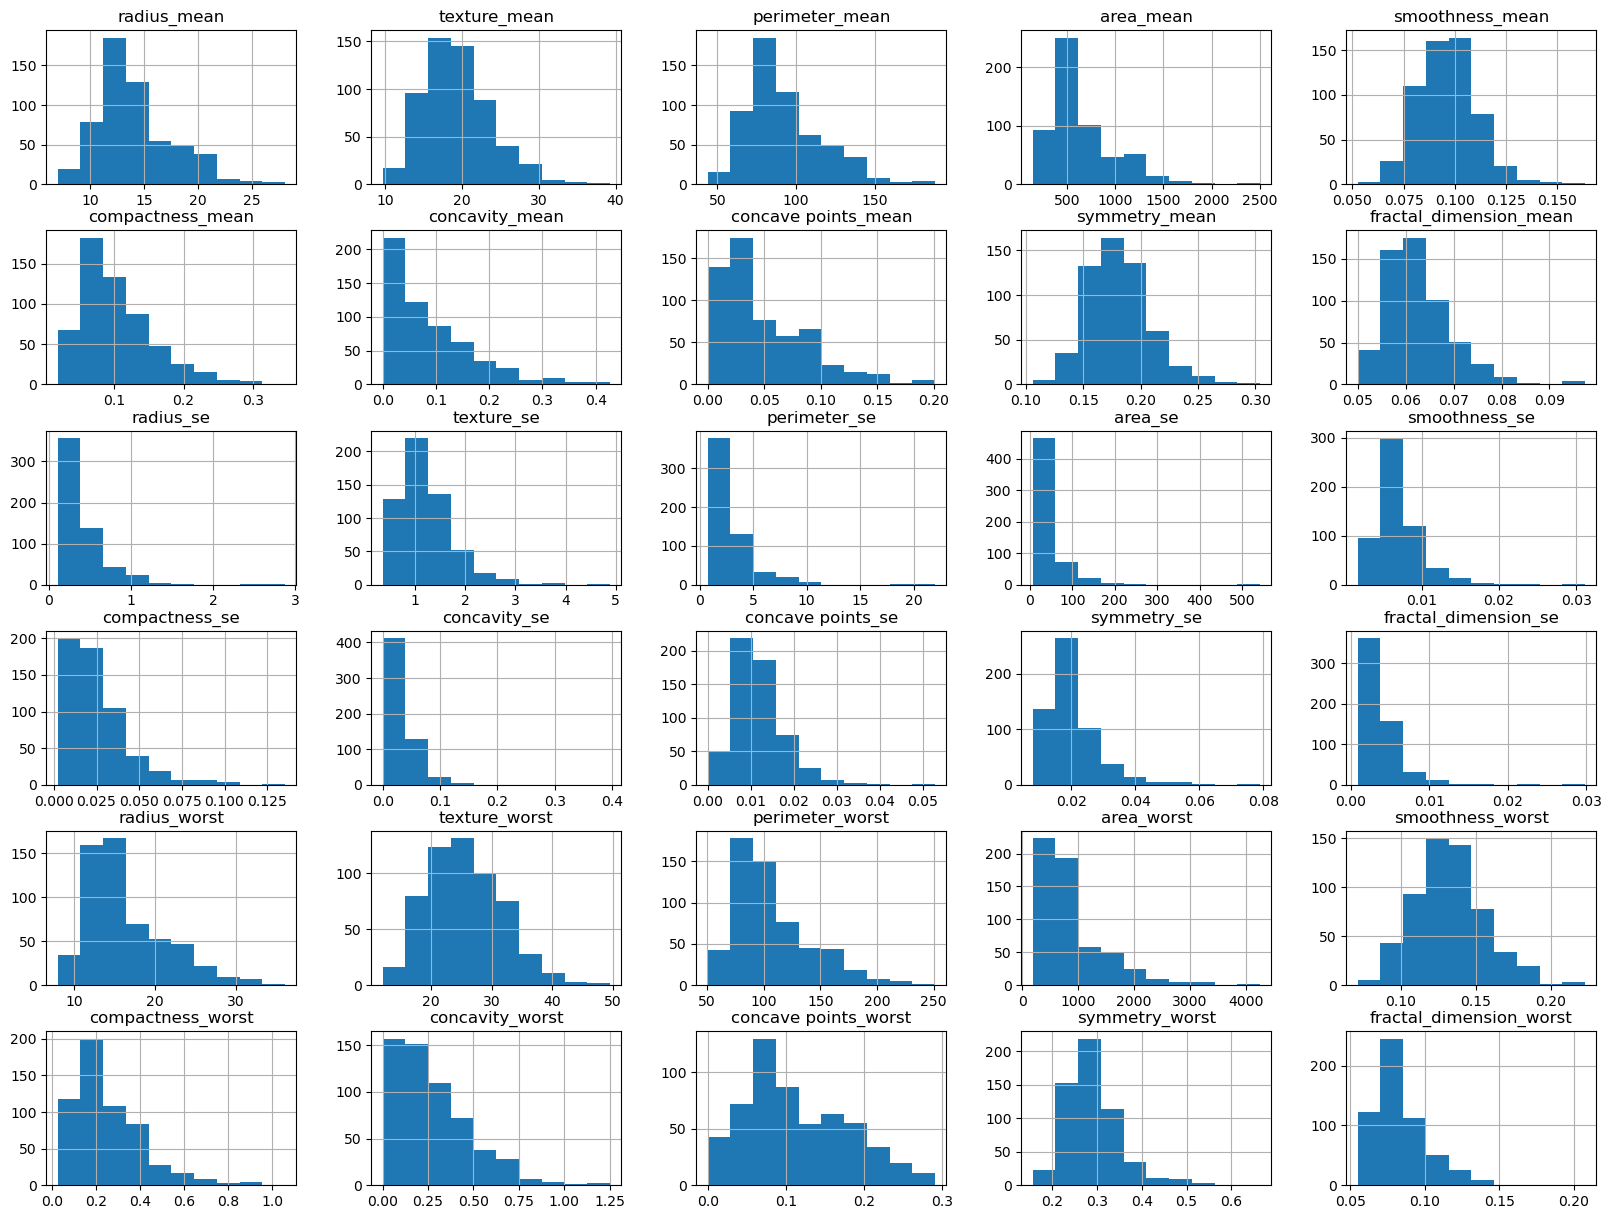

In [10]:
data.hist(figsize = (20, 15))
plt.show()

## 2. Prepare Target

In [11]:
# Encoding the values of the 'diagnosis' column from M,B to 1,0:
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})

In [12]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

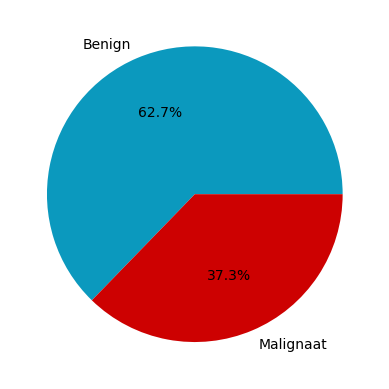

In [13]:
plt.pie(data['diagnosis'].value_counts().values, labels = ['Benign', 'Malignaat'], colors = ['#0b99be', '#cd0101'], 
        autopct = '%1.1f%%')

plt.show()

## 3. Data Correlation

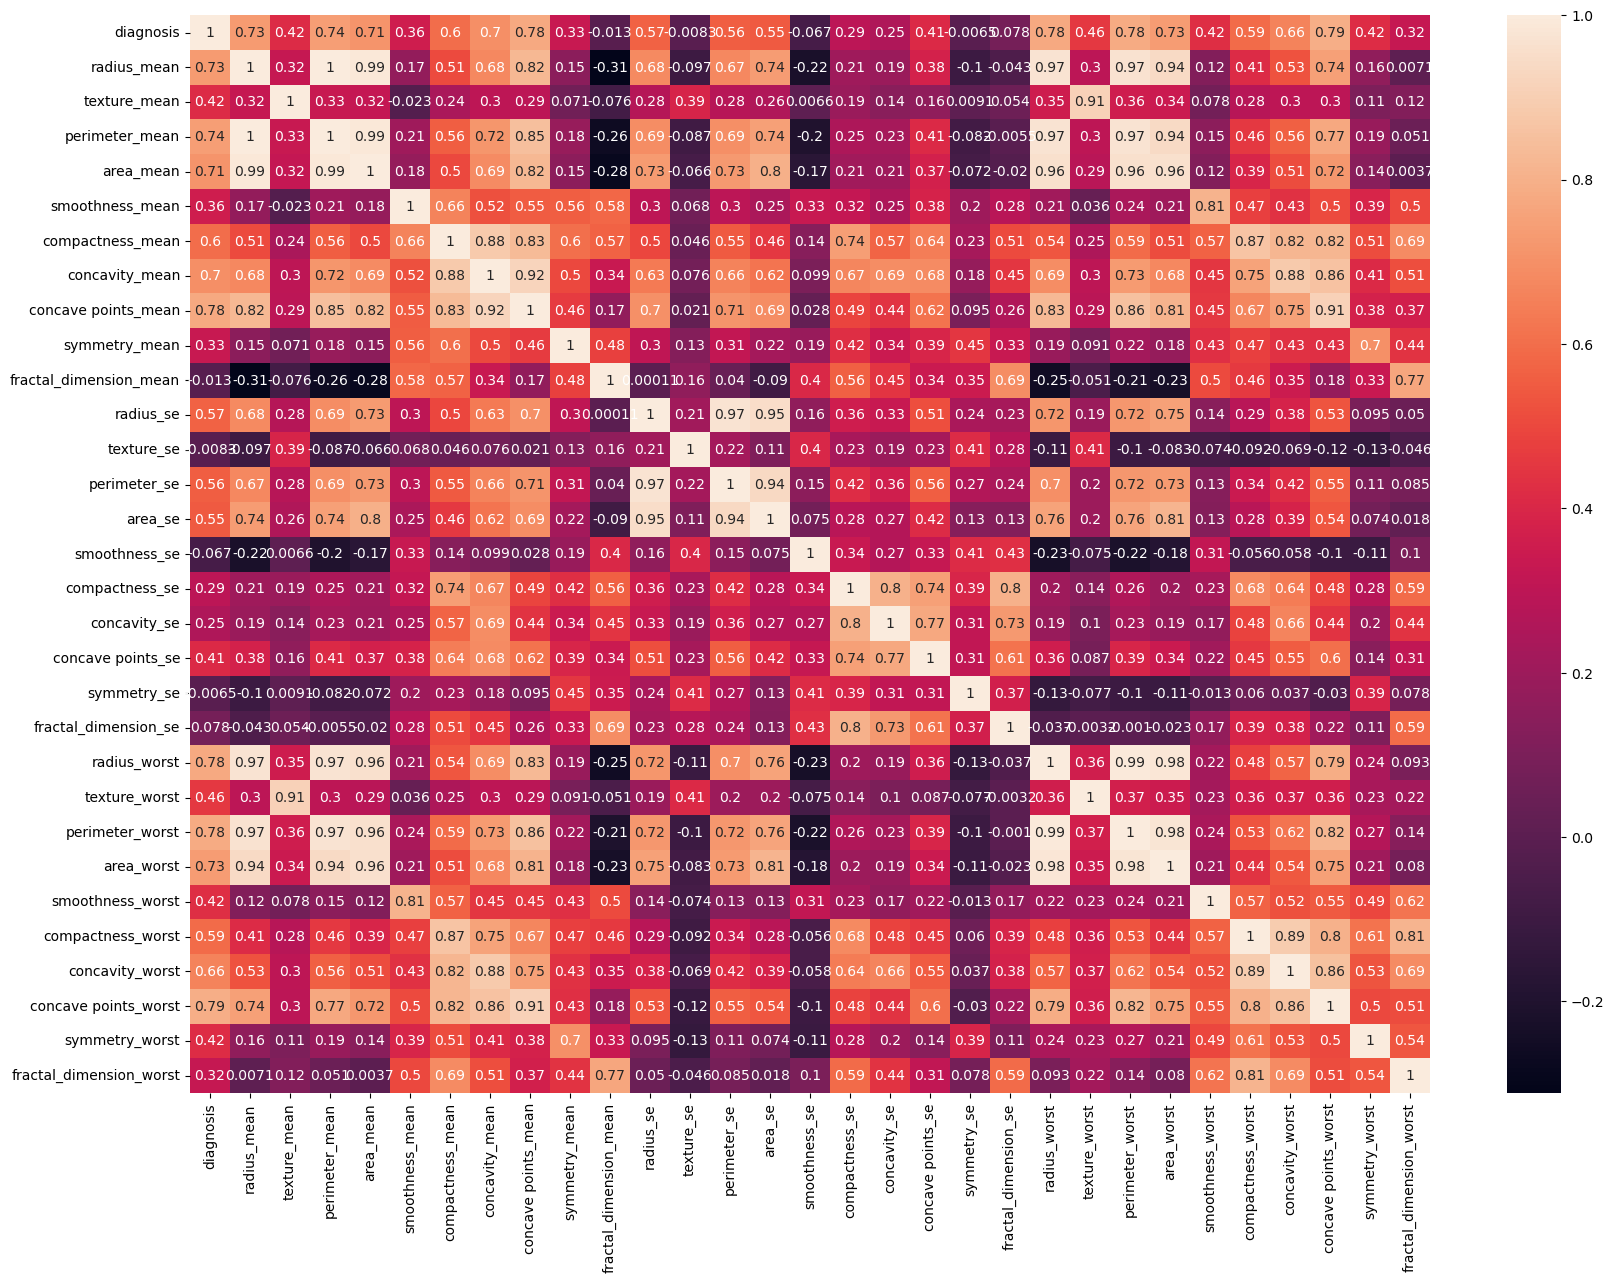

In [14]:
plt.figure(figsize = (20, 14))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [15]:
# Correlations with diagnosis
corr = data.corr()['diagnosis'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


Drop some features with low correlation with the target

In [16]:
data = data.drop(columns = ['fractal_dimension_se', 'symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se'])

# Modeling

In [17]:
# splitying data into train and test data
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42)

In [18]:
# Features Scaling
scaler = StandardScaler().fit(X_train)

# Features Scaling for X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state = 42)

# Training Model (Fitting)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
# training and testing score
print('Training Score: ', log_reg.score(X_train, y_train))
print('Testing Score: ', log_reg.score(X_test, y_test))

Training Score:  0.9868131868131869
Testing Score:  0.9736842105263158


In [21]:
# Define the parameter grid to search
param_grid = {'solver': ['lbfgs', 'liblinear'],
              'penalty': ['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 1, 3, 5, 8, 10], 
              'max_iter': [100, 500, 700, 850, 1000, 1200]}

# Create a grid search object
grid_search = GridSearchCV(estimator = log_reg, param_grid = param_grid, cv = 5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search.best_params_)
print('Best score     : ', grid_search.best_score_)

Best parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score     :  0.9780219780219781


In [22]:
# Logistic Regression Model after Grid Search
log_reg = LogisticRegression(penalty = 'l1', solver =  'liblinear', C = 1, max_iter = 100, random_state = 42)

# Training Model (Fitting)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [23]:
# training and testing score
print('Training Score: ', log_reg.score(X_train, y_train))
print('Testing Score: ', log_reg.score(X_test, y_test))

Training Score:  0.9868131868131869
Testing Score:  0.9736842105263158


In [24]:
# Cross Validation for Logistic Regression Model
log_reg_scores = cross_val_score(log_reg, X_train, y_train, scoring = 'roc_auc', cv = 5)

print(f'Logistic Regression Accuracy          :  {log_reg_scores}')
print(f'Logistic Regression Standard Deviation:  {round(log_reg_scores.std(), 2)}')
print(f'Logistic Regression Accuracy Mean     :  {round(log_reg_scores.mean() * 100, 2)} %')

Logistic Regression Accuracy          :  [1.         0.9628483  1.         0.99329205 0.99432405]
Logistic Regression Standard Deviation:  0.01
Logistic Regression Accuracy Mean     :  99.01 %


In [25]:
# y predicted value
y_pred = log_reg.predict(X_test)

# y predicted probability
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

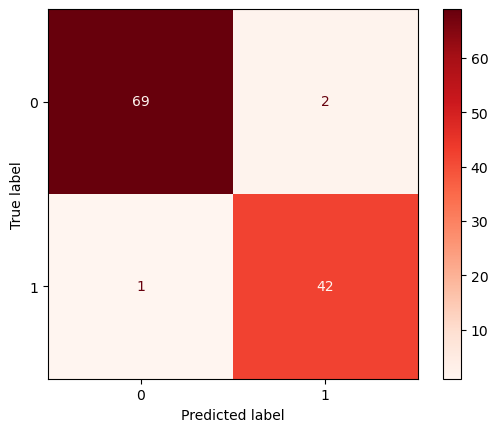

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
matrix.plot(cmap = 'Reds')

In [27]:
# Classification Report
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



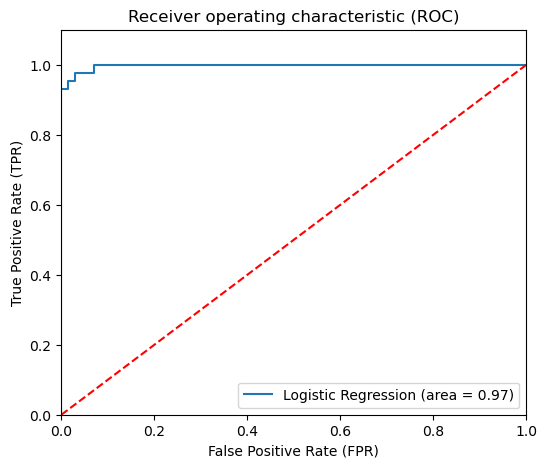

In [28]:
# ROC_AUC Score
log_reg_roc_auc = roc_auc_score(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


plt.figure(figsize = (6, 5))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % log_reg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc = "lower right")
plt.show()

# Modeling after Feature Selection

In [29]:
# Use ANOVA F-value as the scoring function for feature selection, k = 10 to select the top 10 features.
selector = SelectKBest(score_func = f_classif, k = 10) 

# Fit the selector to the data 
selector.fit(X, y) 

# Get the scores and p-values of each feature 
scores = selector.scores_ 
p_values = selector.pvalues_ 

# Create a DataFrame to display the scores and p-values of each feature 
results = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'p-value': p_values}) 
results.sort_values('Score', ascending = False, inplace = True)
results

,Feature,Score,p-value
22,concave points_worst,964.385393,1.969100e-124
17,perimeter_worst,897.944219,5.771397e-119
7,concave points_mean,861.676020,7.101150e-116
15,radius_worst,860.781707,8.482292e-116
2,perimeter_mean,697.235272,8.436251e-101
18,area_worst,661.600206,2.828848e-97
0,radius_mean,646.981021,8.465941e-96
3,area_mean,573.060747,4.734564e-88
6,concavity_mean,533.793126,9.966556e-84
21,concavity_worst,436.691939,2.464664e-72


In [30]:
# Select the top K features based on the scores 
top_features = X.columns[selector.get_support()]  

# Display the top features 
print(top_features)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [31]:
# splitying data into train and test data
X_top_features = data[top_features]
y = data['diagnosis'] 

X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size  = 0.2, random_state = 42)

In [32]:
# Features Scaling
scaler = StandardScaler().fit(X_train)

# Features Scaling for X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Logistic Regression Model
log_reg_top_features = LogisticRegression(random_state = 42)

# Training Model (Fitting)
log_reg_top_features.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
# training and testing score
print('Training Score: ', log_reg_top_features.score(X_train, y_train))
print('Testing Score: ', log_reg_top_features.score(X_test, y_test))

Training Score:  0.9604395604395605
Testing Score:  0.9736842105263158


In [35]:
# Define the parameter grid to search
param_grid = {'solver': ['lbfgs', 'liblinear'],
              'penalty': ['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 1, 3, 5, 8, 10], 
              'max_iter': [100, 500, 700, 850, 1000, 1200]}

# Create a grid search object
grid_search = GridSearchCV(estimator = log_reg_top_features, param_grid = param_grid, cv = 5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search.best_params_)
print('Best score     : ', grid_search.best_score_)

Best parameters:  {'C': 3, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score     :  0.9604395604395604


In [36]:
# Logistic Regression Model after Grid Search
log_reg_top_features = LogisticRegression(penalty = 'l1', solver =  'liblinear', C = 3, max_iter = 100, random_state = 42)

# Training Model (Fitting)
log_reg_top_features.fit(X_train, y_train)

LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')

In [37]:
# training and testing score
print('Training Score: ', log_reg_top_features.score(X_train, y_train))
print('Testing Score: ', log_reg_top_features.score(X_test, y_test))

Training Score:  0.9626373626373627
Testing Score:  0.9912280701754386


In [38]:
# Cross Validation for Logistic Regression Model
log_reg_scores = cross_val_score(log_reg_top_features, X_train, y_train, scoring = 'roc_auc', cv = 5)

print(f'Logistic Regression Accuracy          :  {log_reg_scores}')
print(f'Logistic Regression Standard Deviation:  {round(log_reg_scores.std(), 2)}')
print(f'Logistic Regression Accuracy Mean     :  {round(log_reg_scores.mean() * 100, 2)} %')

Logistic Regression Accuracy          :  [0.99268548 0.95923633 1.         0.98813209 0.98968008]
Logistic Regression Standard Deviation:  0.01
Logistic Regression Accuracy Mean     :  98.59 %


In [39]:
# y predicted value
y_pred = log_reg_top_features.predict(X_test)

# y predicted probability
y_pred_proba = log_reg_top_features.predict_proba(X_test)[:, 1]

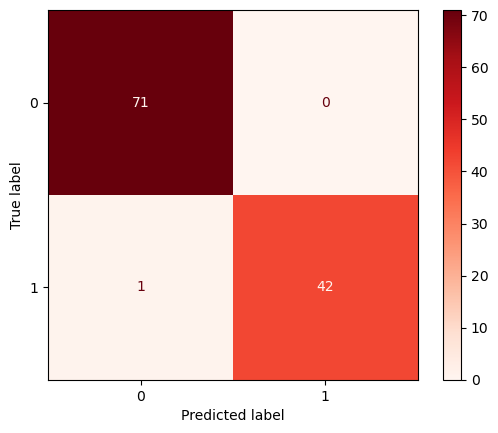

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
matrix.plot(cmap = 'Reds')

In [41]:
# Classification Report
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



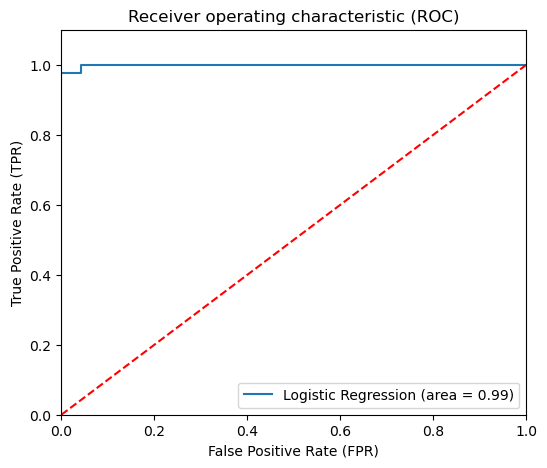

In [42]:
# ROC_AUC Score
log_reg_roc_auc = roc_auc_score(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


plt.figure(figsize = (6, 5))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % log_reg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc = "lower right")
plt.show()

**Before doing the feature selection, the accuracy of the model was 97% based on ROC_AUC_Score. After doing the feature selection,  the accuracy of the model was 99% based on ROC_AUC_Score, too.**